# i. Introductions

- Name : Sihar H Pangaribuan
- Batch : HCK-005
- Dataset : ['Home Credit Default Risk'](https://www.kaggle.com/competitions/home-credit-default-risk/)
- Objective : Analize and Predict Home Risk Customers 

# ii. Import Library

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

import pickle, joblib

import phik
from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

# iii. Data Loading

In [2]:
# Import Dataset
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
application_train.isna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,Tru

In [5]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [9]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [10]:
credit_card_balance['SK_ID_CURR'].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3840307     True
3840308     True
3840309     True
3840310     True
3840311     True
Name: SK_ID_CURR, Length: 3840312, dtype: bool

In [11]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [13]:
# Check shape dataset
print('application_train:', application_train.shape[0], "rows and", application_train.shape[1],'columns')
print('application_test:', application_test.shape[0], "rows and", application_test.shape[1],'columns')
print('POS_CASH_balance:', POS_CASH_balance.shape[0], "rows and", POS_CASH_balance.shape[1],'columns')
print('bureau:', bureau.shape[0], "rows and", bureau.shape[1],'columns')
print('bureau_balance:', bureau_balance.shape[0], "rows and", bureau_balance.shape[1],'columns')
print('previous_application:', previous_application.shape[0], "rows and", previous_application.shape[1],'columns')
print('installments_payments:', installments_payments.shape[0], "rows and", installments_payments.shape[1],'columns')
print('credit_card_balance:', credit_card_balance.shape[0], "rows and", credit_card_balance.shape[1],'columns')

application_train: 307511 rows and 122 columns
application_test: 48744 rows and 121 columns
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns
installments_payments: 13605401 rows and 8 columns
credit_card_balance: 3840312 rows and 23 columns


# iv. Exploratory Data Analisys

## iv.1 EDA on application_train dataset

In [14]:
application_train = application_train[["SK_ID_CURR",
"TARGET",
"NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"REGION_POPULATION_RELATIVE",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"OCCUPATION_TYPE",
"CNT_FAM_MEMBERS",
"REGION_RATING_CLIENT",
"REGION_RATING_CLIENT_W_CITY",
"HOUR_APPR_PROCESS_START",
"ORGANIZATION_TYPE",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"DAYS_LAST_PHONE_CHANGE"
]]

### Check Duplicated value

In [15]:
application_train[application_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE


In [16]:
application_train.shape

(307511, 32)

### Check data balance or imbalance in Target

### Check missing value

In [17]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = round((application_train.isnull().sum()/application_train.isnull().count()*100),2).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head()

,Total,Percent
EXT_SOURCE_1,173378,56.38
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33


Terdapat sangat banyak missing value, nanti akan di handle sebelum masuk ke model

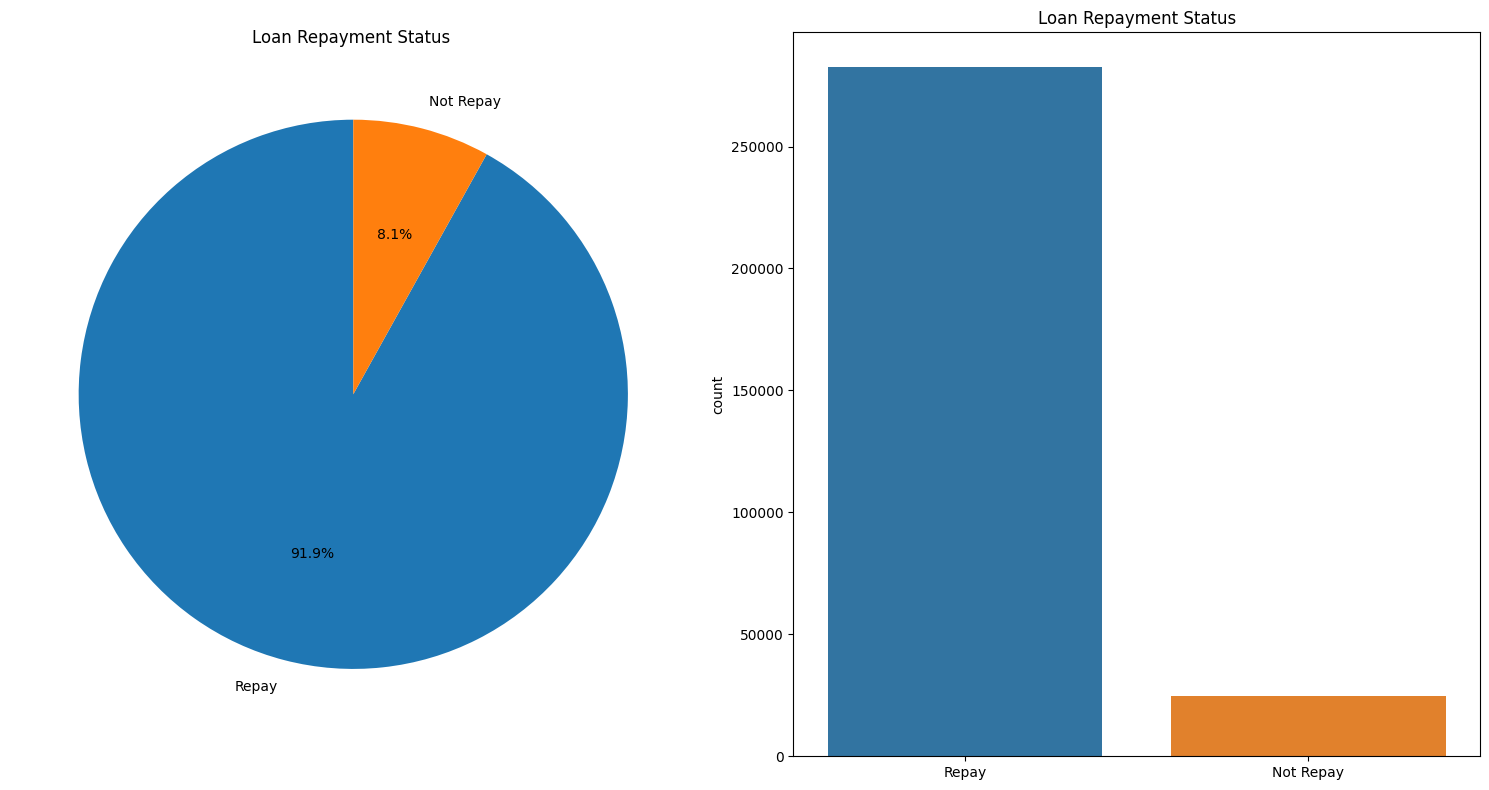

In [18]:
# Get counts of target values
target_counts = application_train['TARGET'].value_counts()

# Data Label
labels = ['Repay', 'Not Repay']

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Pie chart pada axis 0
axes[0].pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Loan Repayment Status ')

# Bar plot pada axis 1
sns.barplot(x=labels, y=target_counts, ax=axes[1])
axes[1].set_title('Loan Repayment Status')

# Menampilkan subplot
plt.tight_layout()
plt.show()

Dari hasil dapat dilihat bahwa data sangat imbalance, nanti akan di handling di seksion feture enginering

In [19]:
def feature_type_split(data, special_list=[]):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list
cat_list, dis_num_list, num_list = feature_type_split(application_train)

In [20]:
cat_list, dis_num_list, num_list = feature_type_split(application_train)
print(str(len(cat_list)),'categorical features:', cat_list)
print('-----------------------------------------')
print(str(len(dis_num_list)),'discrete numerical features:',dis_num_list)
print('-----------------------------------------')
print(str(len(num_list)),'continuous numerical features:',num_list)

10 categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
-----------------------------------------
8 discrete numerical features: ['TARGET', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
-----------------------------------------
14 continuous numerical features: ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


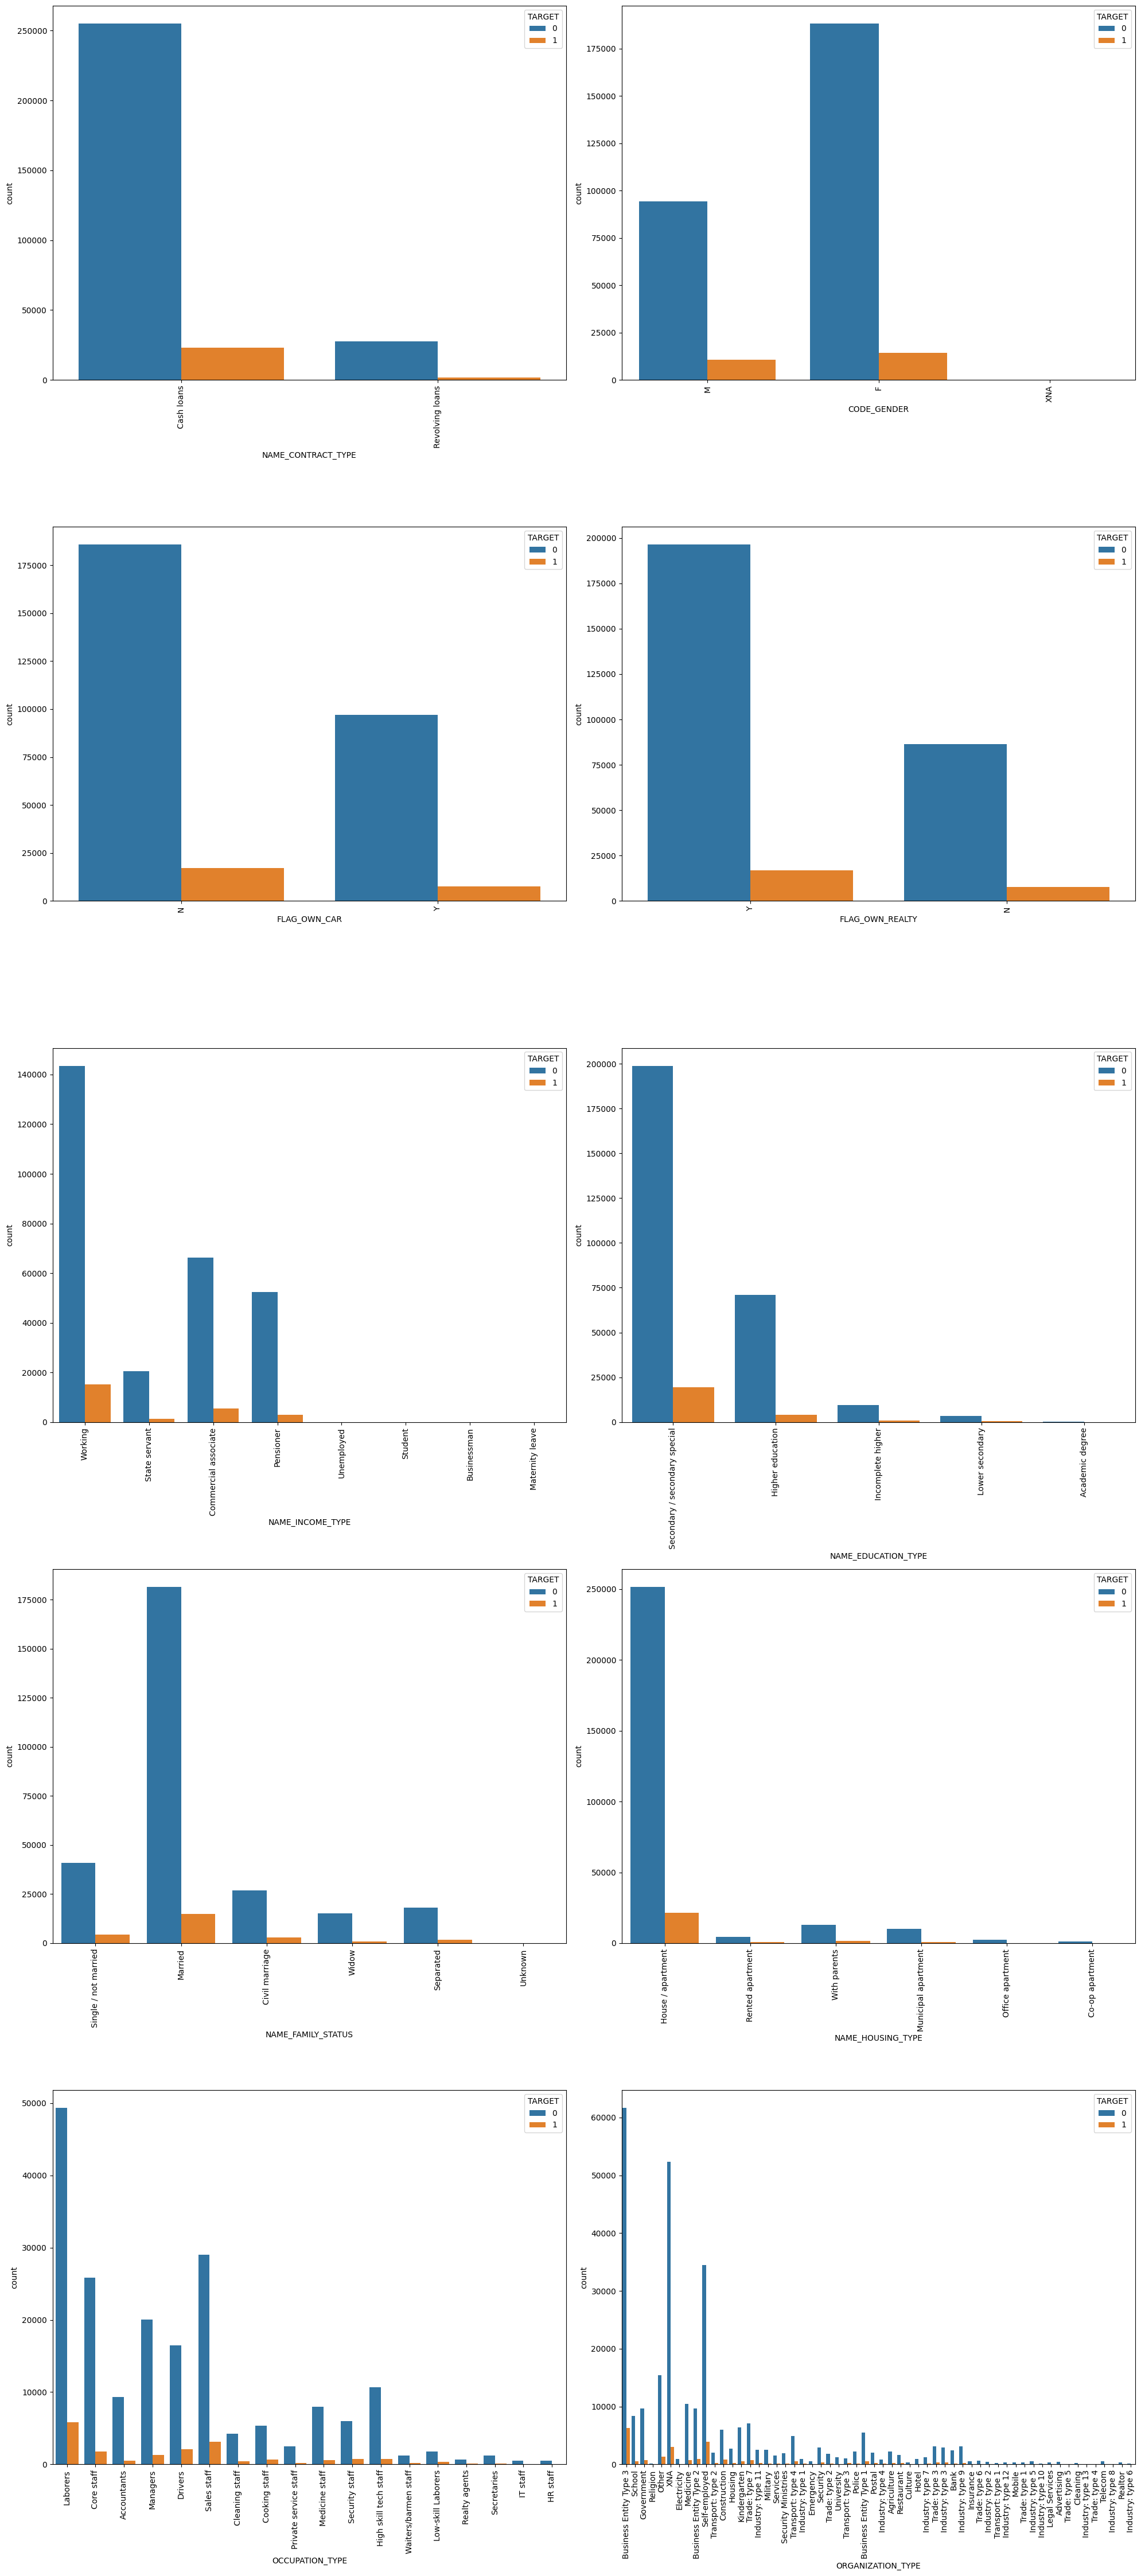

In [21]:
plot = cat_list

fig, axes = plt.subplots(5, 2, figsize=(20, 45))
for cat, ax in zip(plot, axes.flatten()):
    sns.countplot(x=cat, data=application_train, hue='TARGET', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Dari hasil visualisasi didapat beberapa insight
- Kebanyakan customer memiliki type loan yang cash loans
- Kebanyakan customer bergender Female
- kebanyakan customer yang mempunyai model
- Kebanyakan customer yang beredukasi secondary
- Kebanyakan customer yang sudah merid 

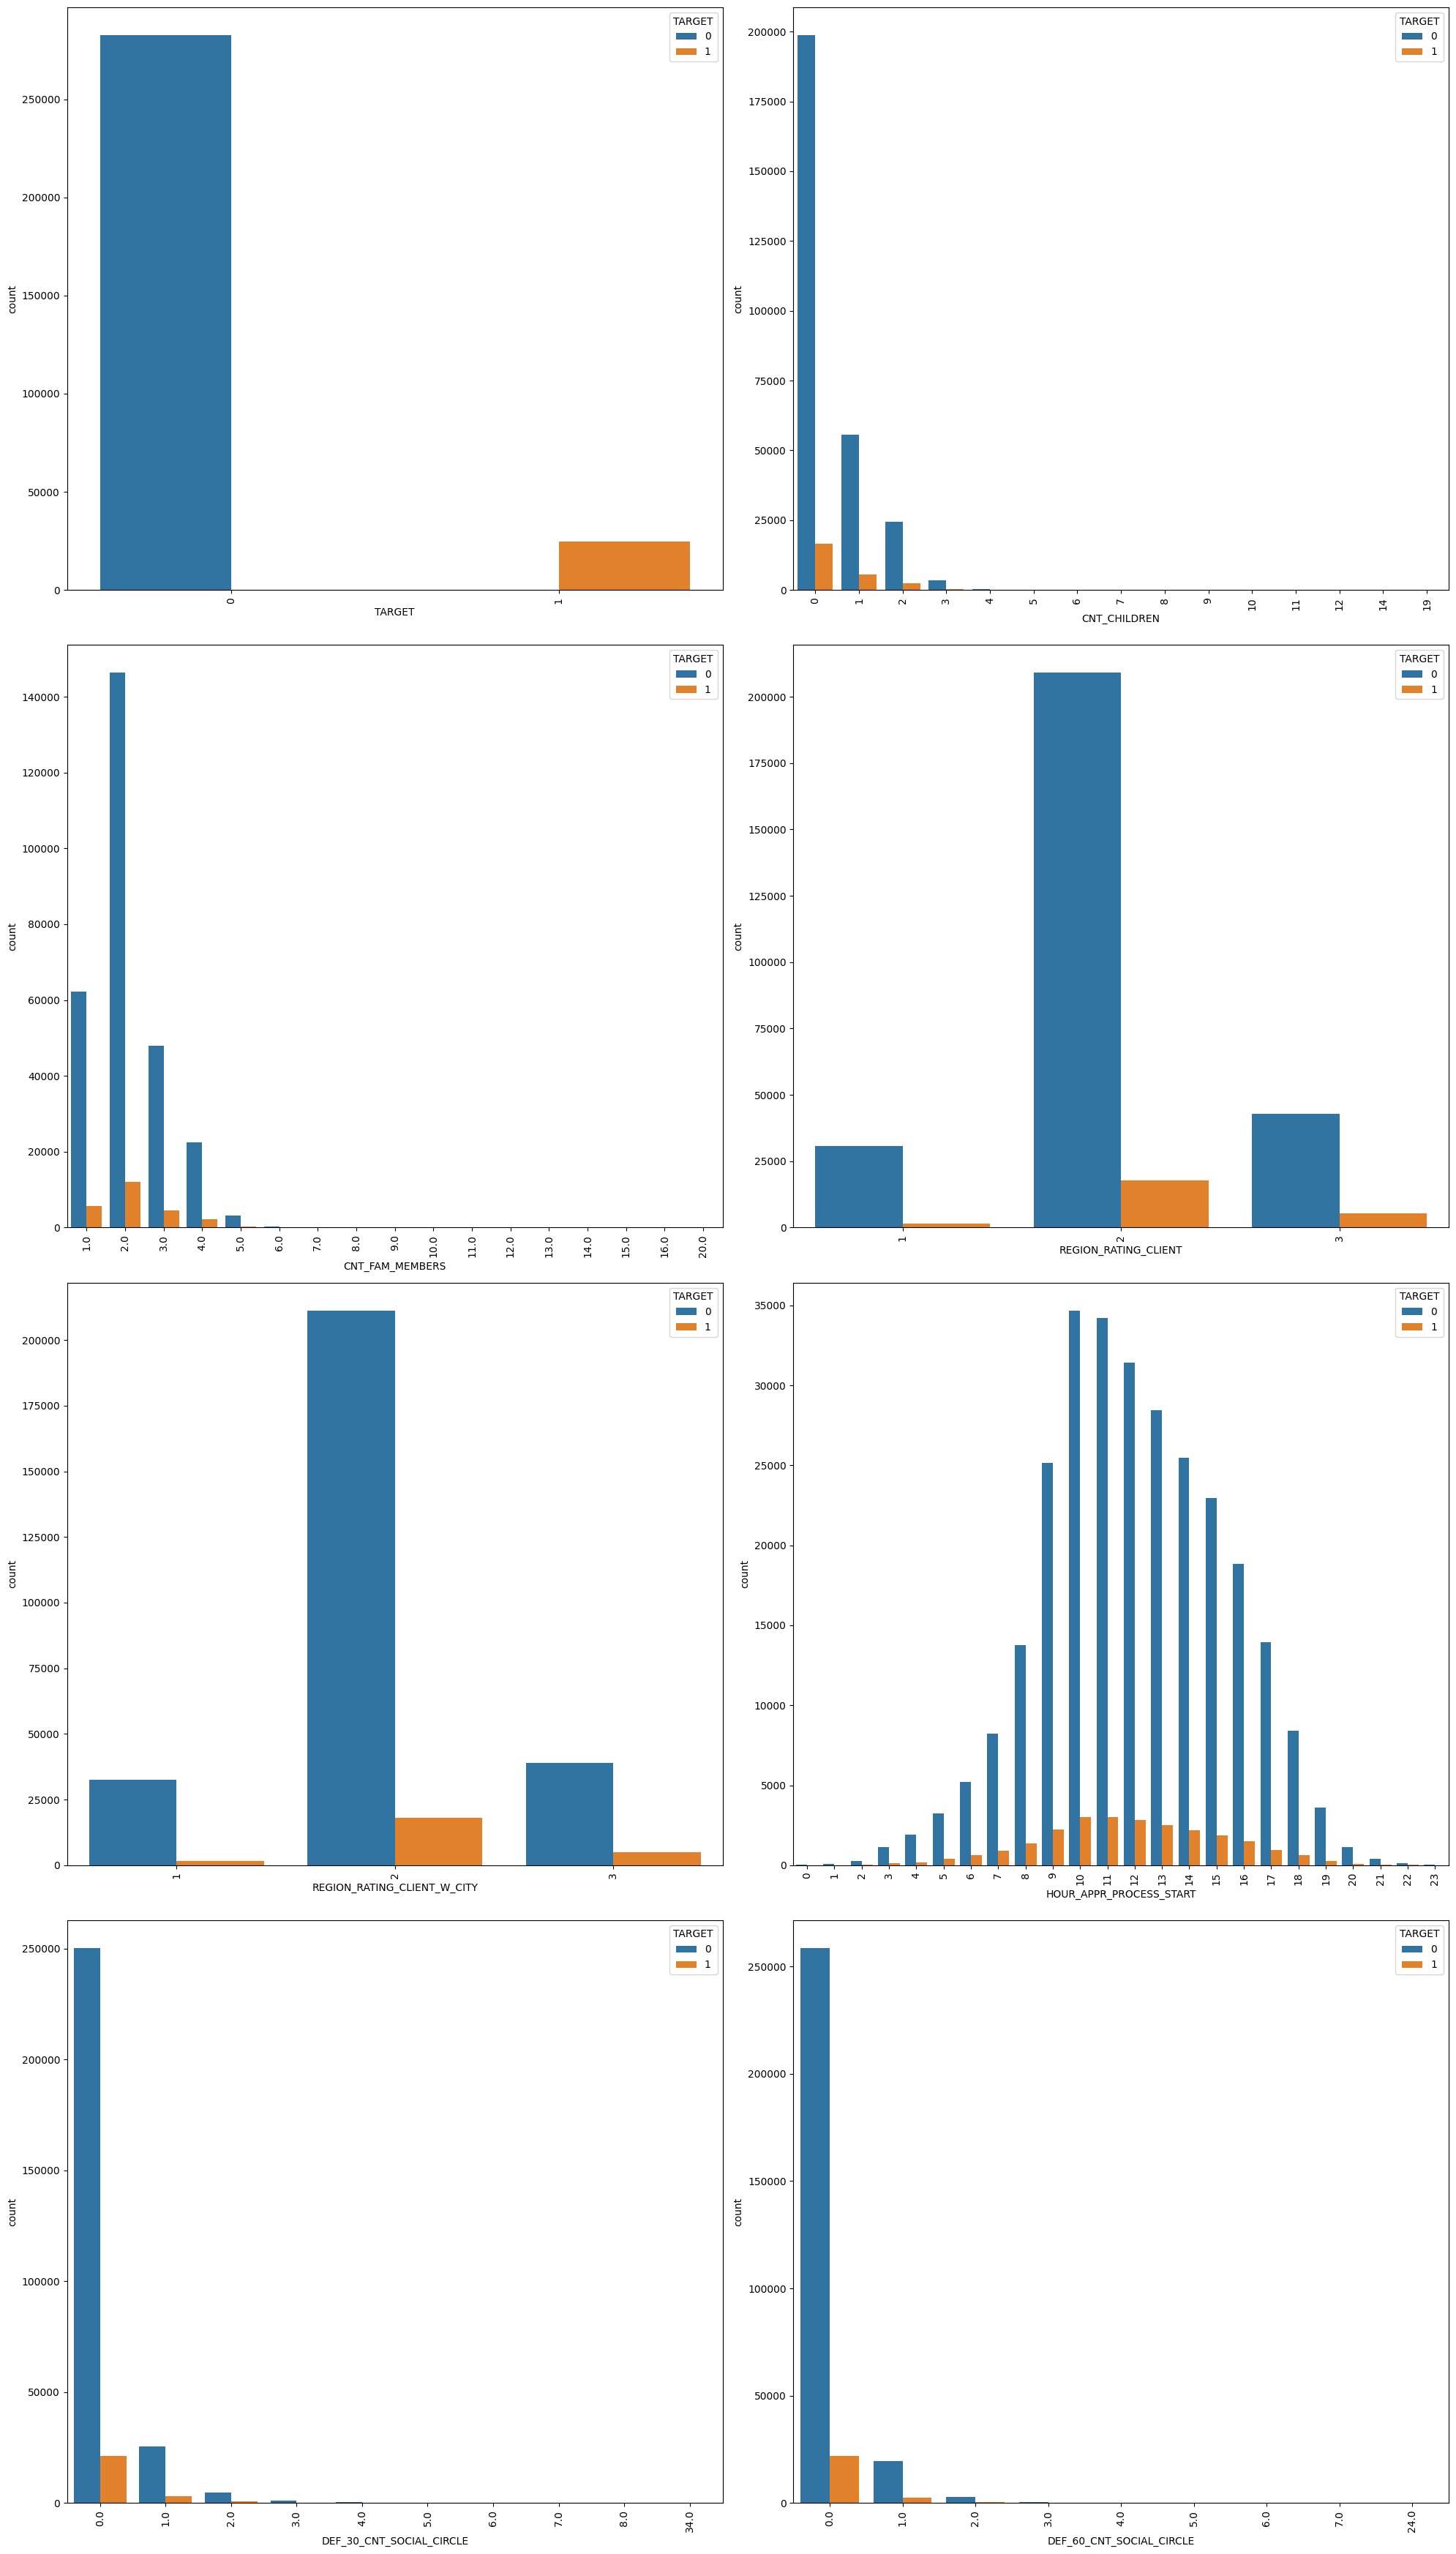

In [22]:
plot = dis_num_list

fig, axes = plt.subplots(4, 2, figsize=(20, 35))
for cat, ax in zip(plot, axes.flatten()):
    sns.countplot(x=cat, data=application_train, hue='TARGET', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Dari visualisasi diketahui kalau customer yang paling banyak pada status married

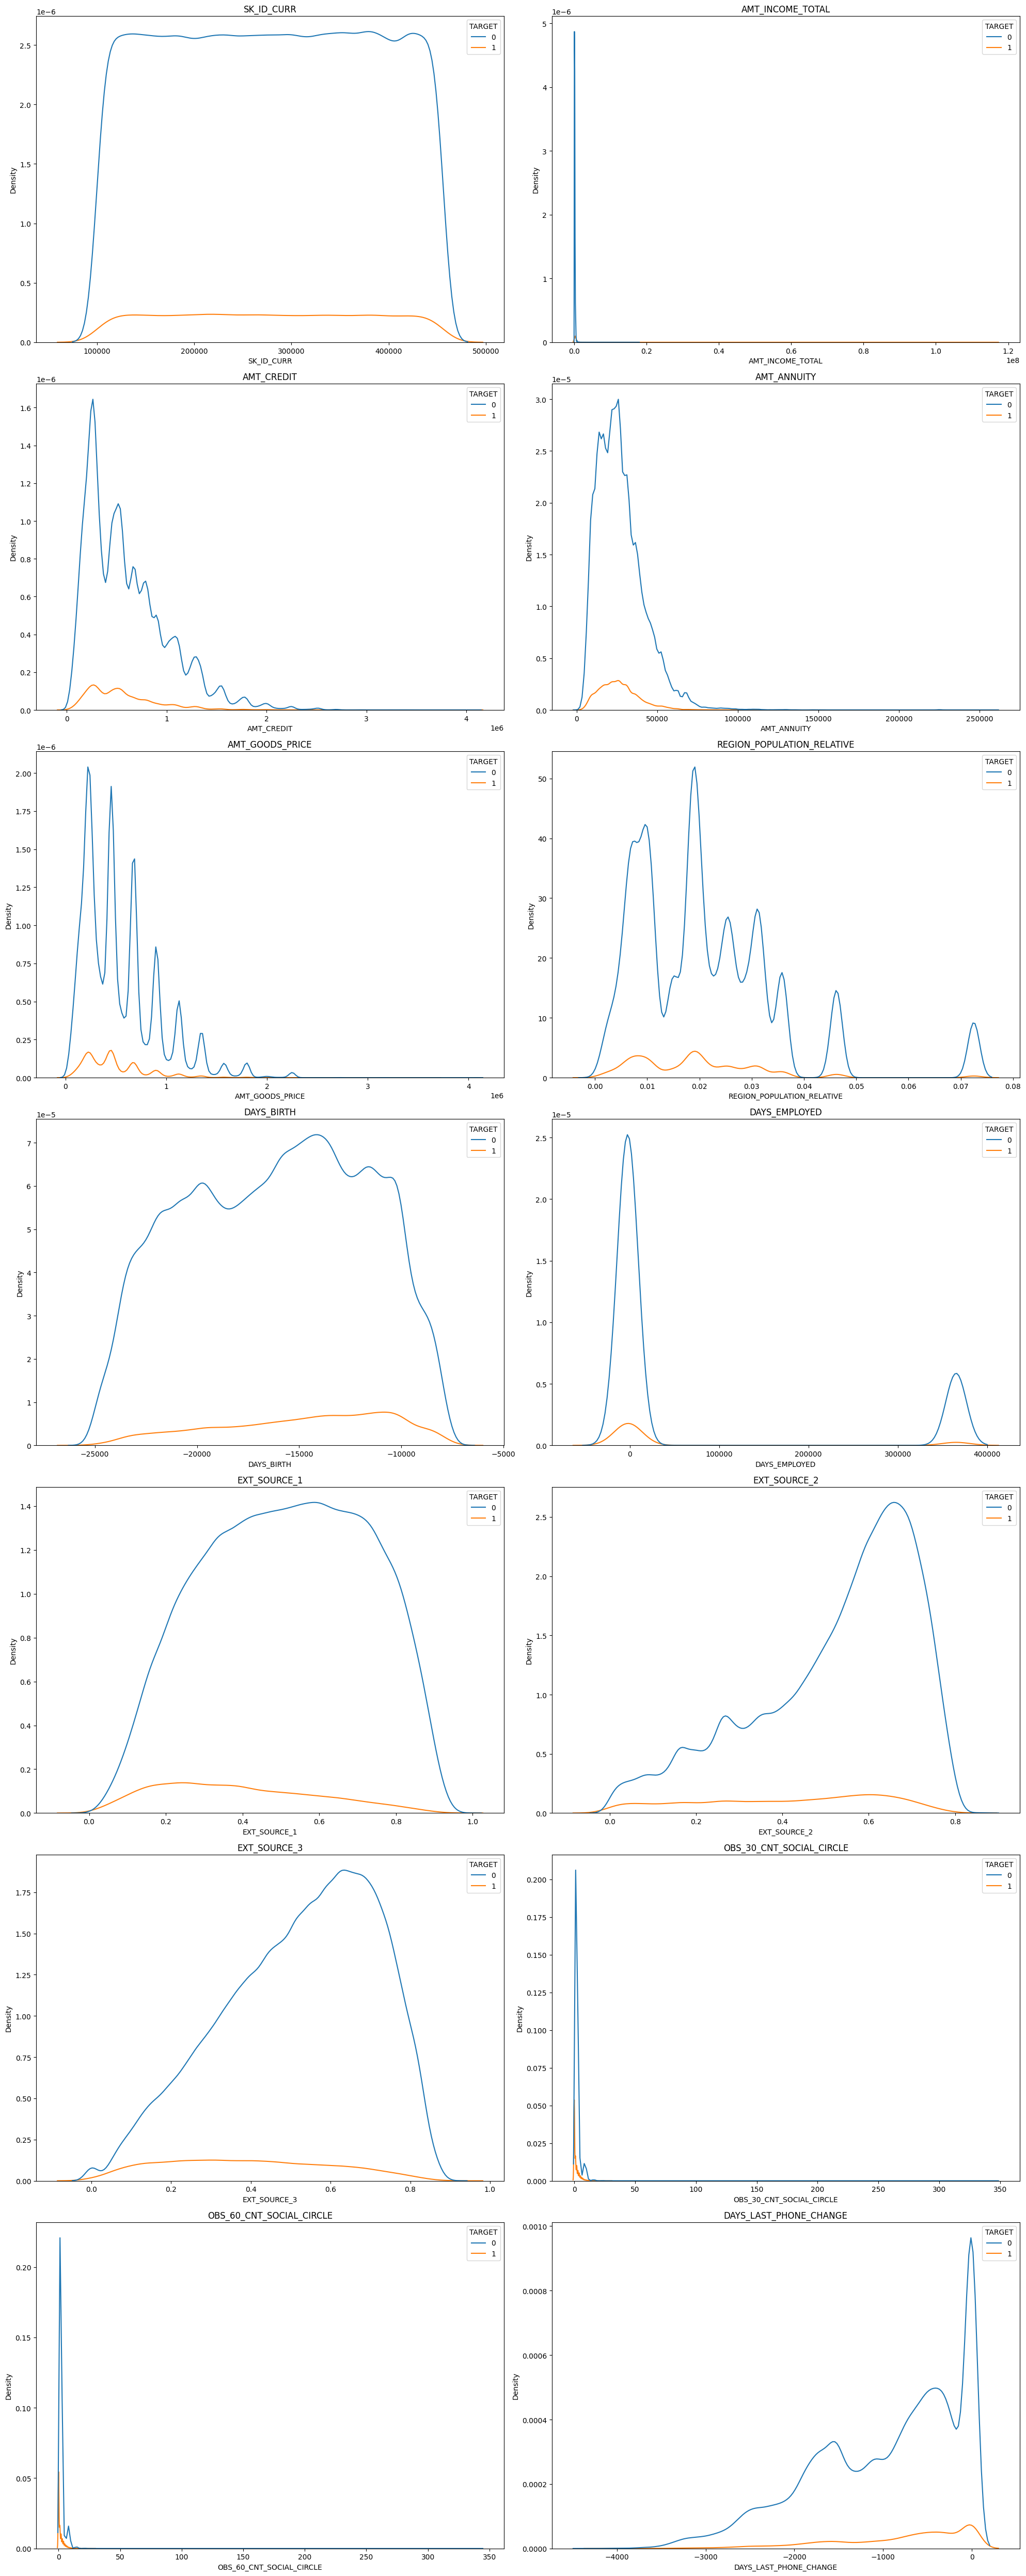

In [23]:
plot = num_list
fig, axes = plt.subplots(7, 2, figsize=(20, 50))

for i, var in enumerate(plot):
    ax = axes.flatten()[i]
    sns.kdeplot(data=application_train, x=var, hue='TARGET', ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [24]:
phik_corr_matrix = application_train.phik_matrix()

interval columns not set, guessing: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


<Axes: >

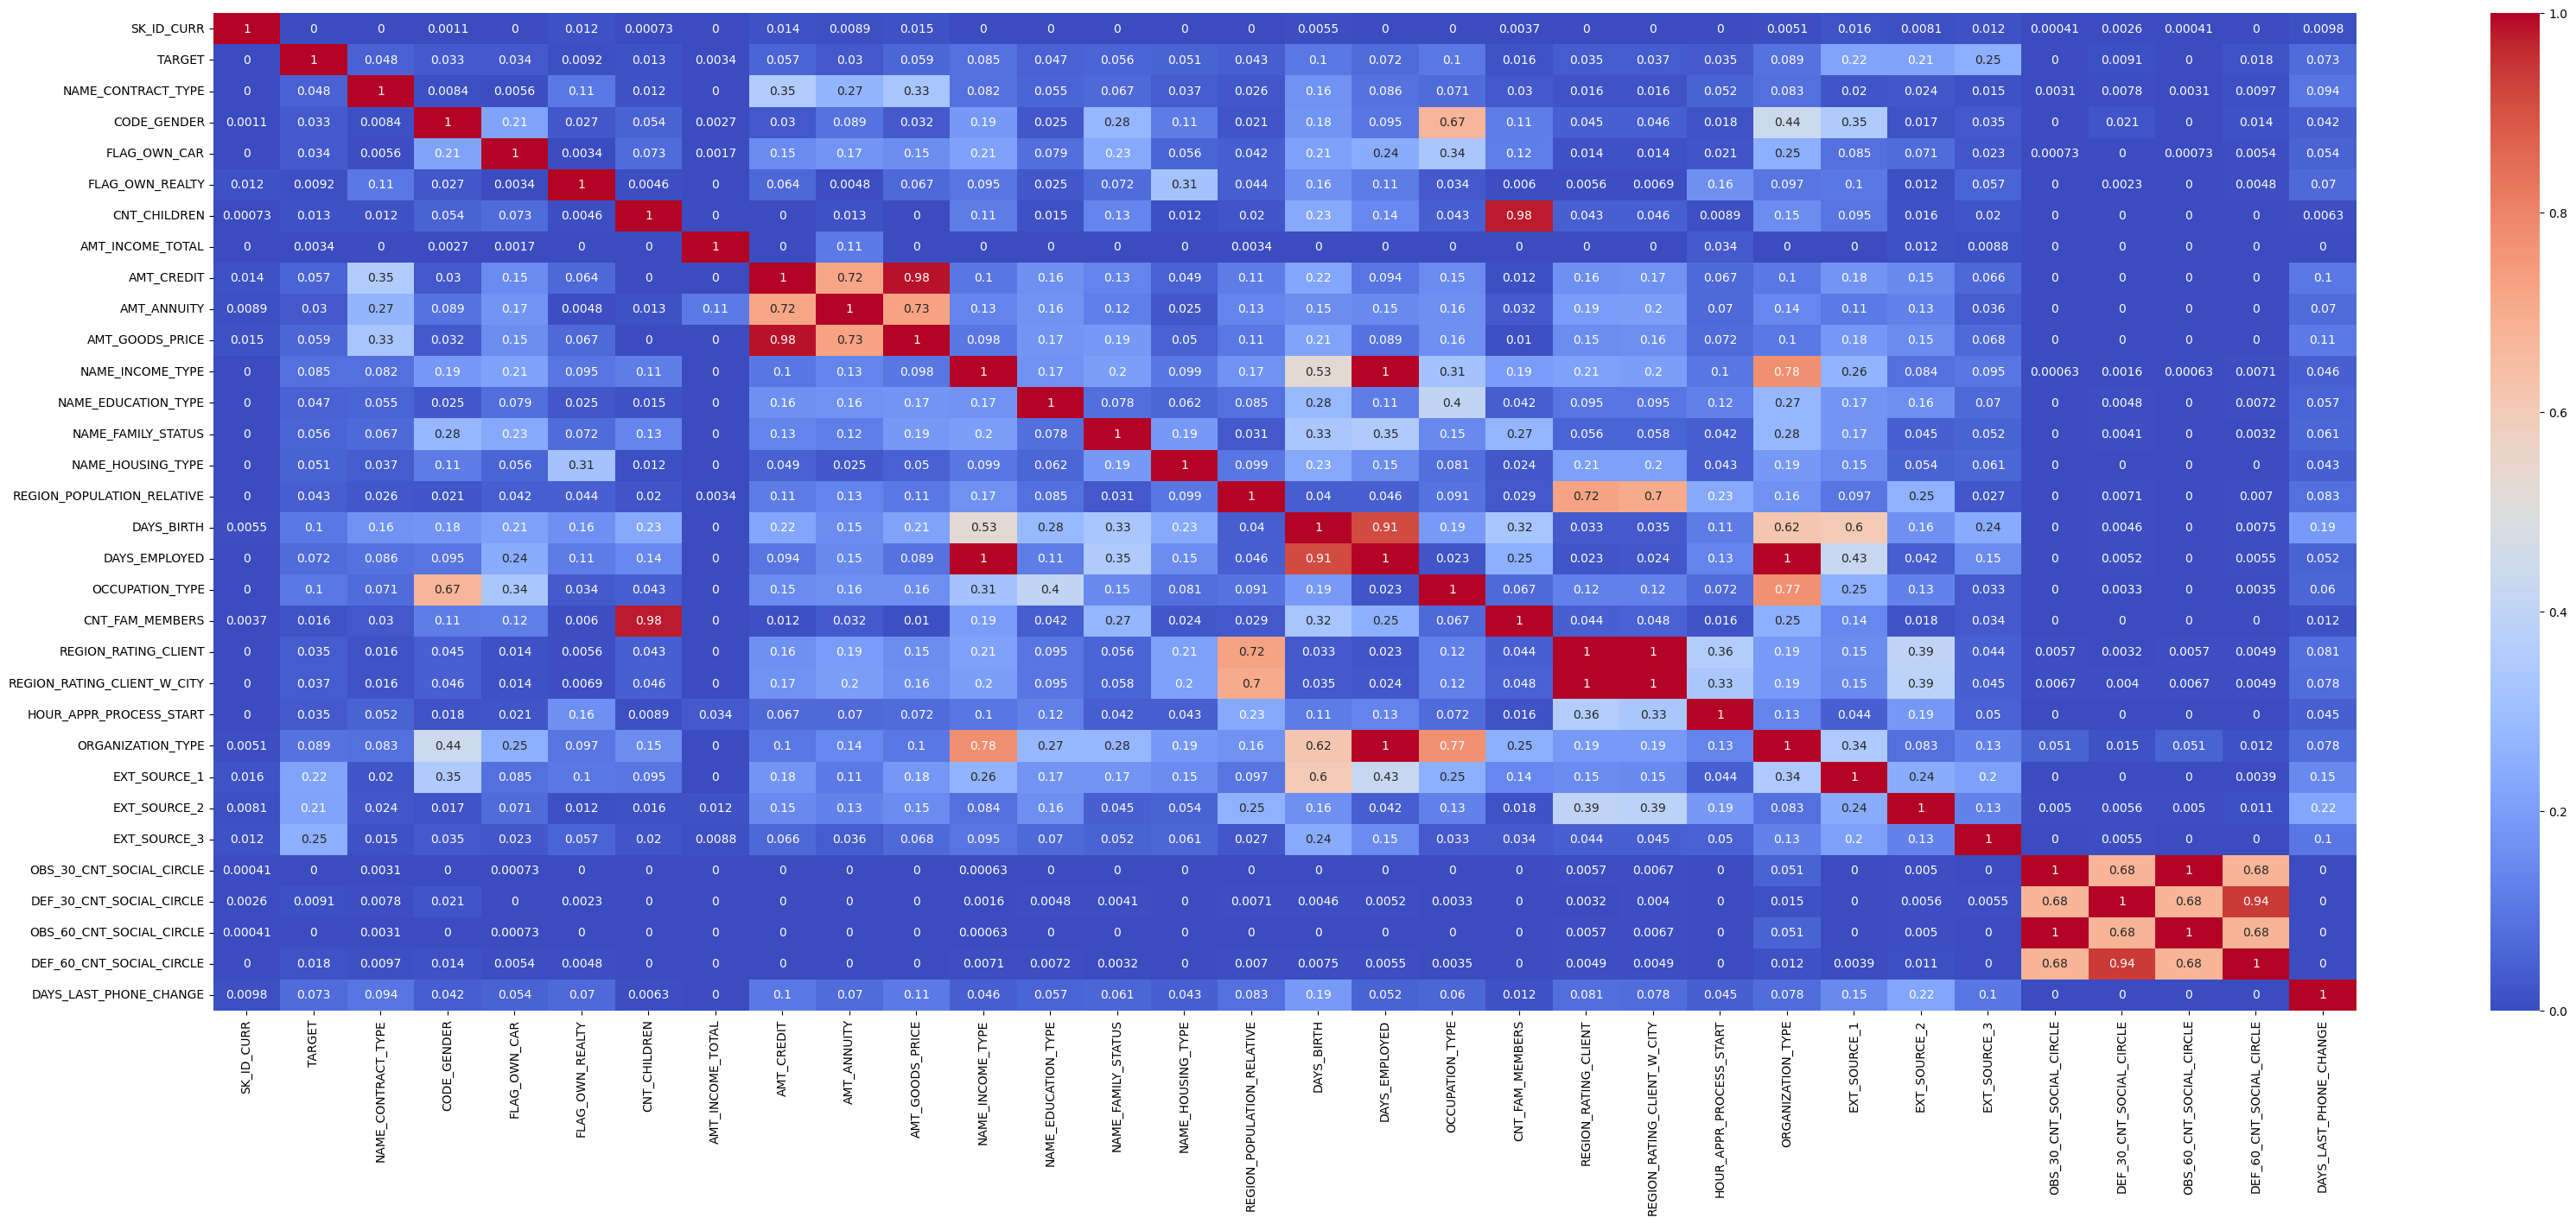

In [25]:
plt.figure(figsize=(40,15))
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm')

In [26]:
df_key= application_train[['SK_ID_CURR','TARGET']]
df_key

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307506,456251,0
307507,456252,0
307508,456253,0
307509,456254,1


## iv.2 EDA on bureau and bureau_balance dataset

In [27]:
data1= pd.merge(df_key, bureau, on='SK_ID_CURR')
data2 = pd.merge(data1, bureau_balance, on='SK_ID_BUREAU')

In [28]:
data2[data2.duplicated()]

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS


In [29]:
data2.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,100002,1,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0,-15,C
1,100002,1,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0,-16,C
2,100002,1,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0,-17,0
3,100002,1,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0,-18,0
4,100002,1,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0,-19,0


In [30]:
cat_list, dis_num_list, num_list = feature_type_split(data2)
print(str(len(cat_list)),'categorical features:', cat_list)
print('-----------------------------------------')
print(str(len(dis_num_list)),'discrete numerical features:',dis_num_list)
print('-----------------------------------------')
print(str(len(num_list)),'continuous numerical features:',num_list)

4 categorical features: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'STATUS']
-----------------------------------------
2 discrete numerical features: ['TARGET', 'CNT_CREDIT_PROLONG']
-----------------------------------------
14 continuous numerical features: ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'MONTHS_BALANCE']


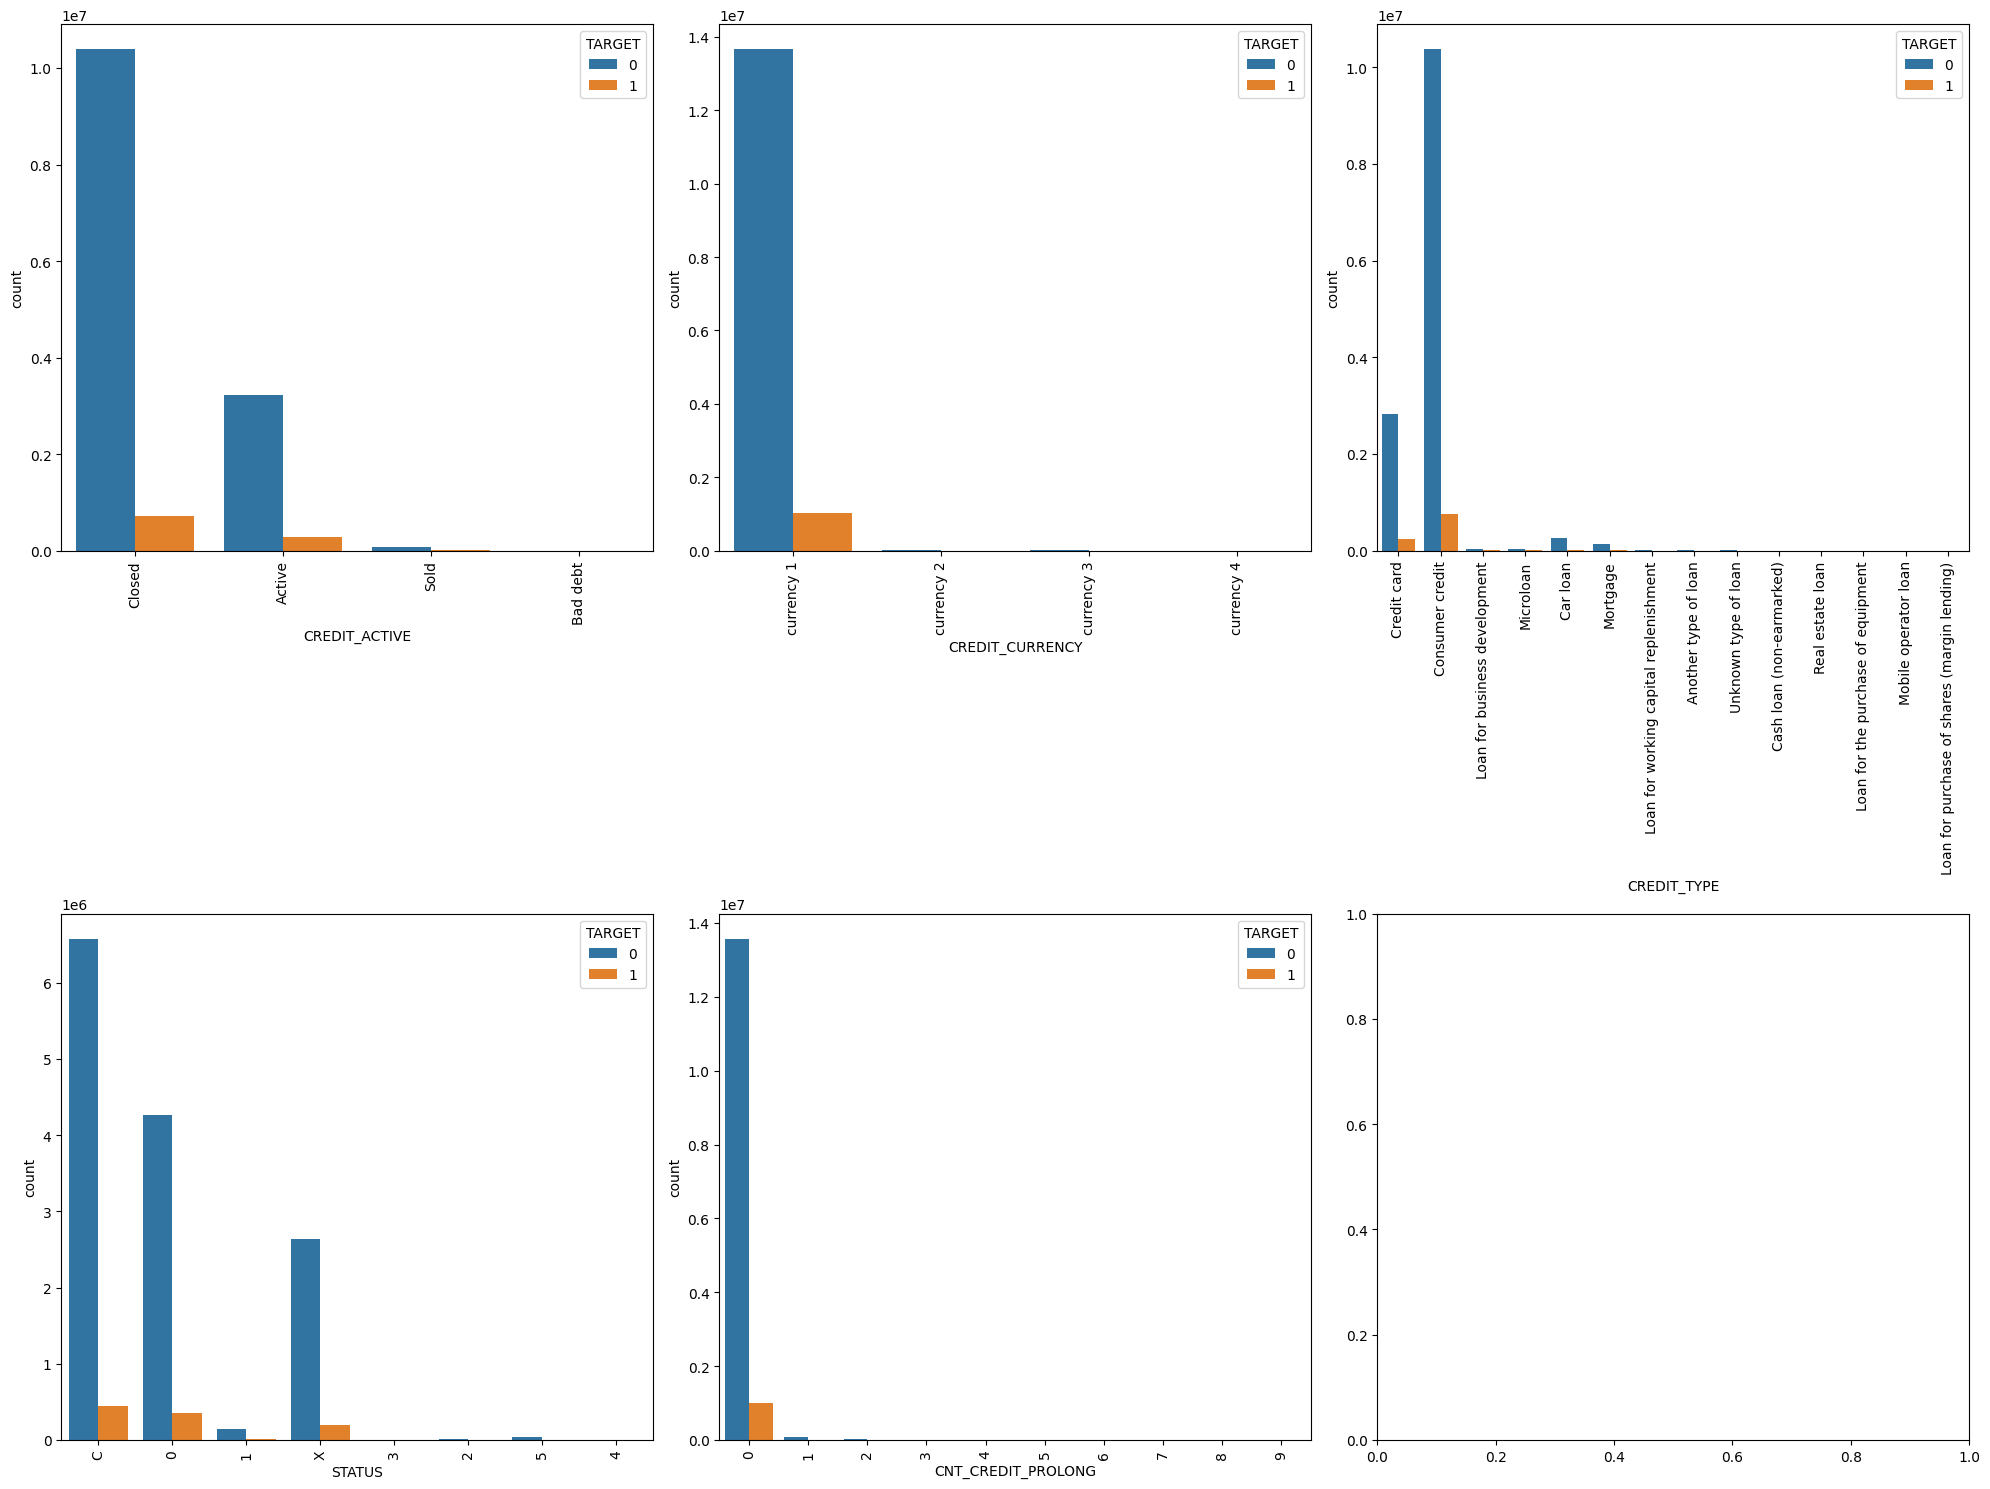

In [130]:
plot = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'STATUS', 'CNT_CREDIT_PROLONG']

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for cat, ax in zip(plot, axes.flatten()):
    sns.countplot(x=cat, data=data2, hue='TARGET', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

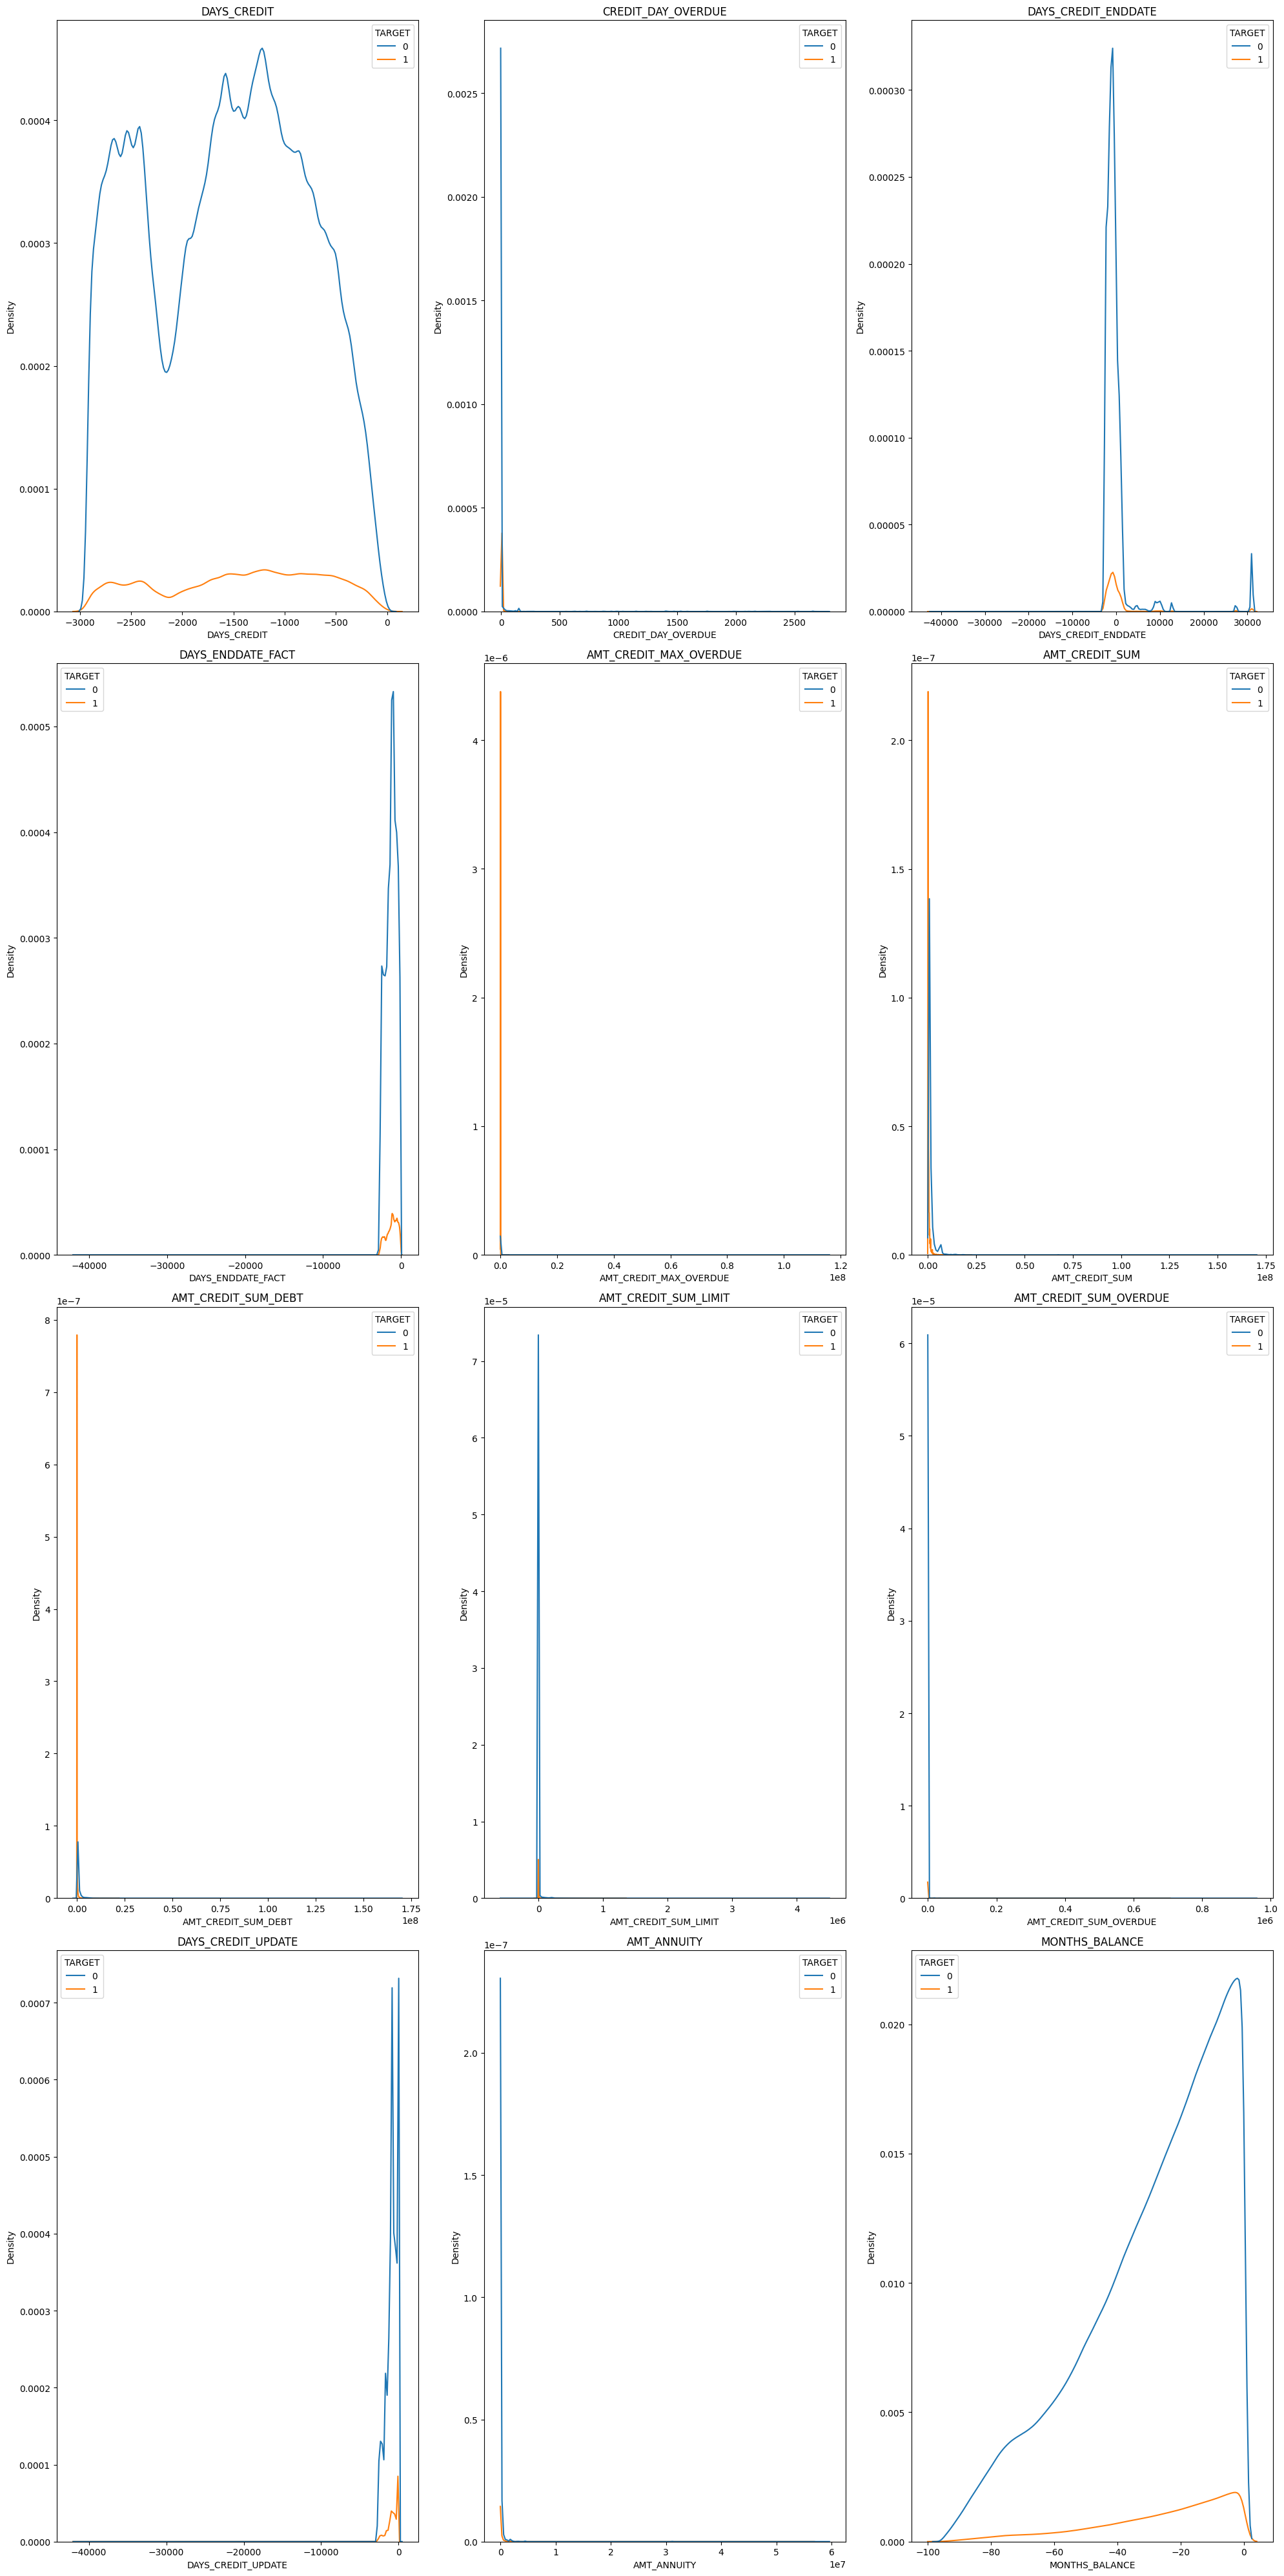

In [131]:
plot = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'MONTHS_BALANCE']
fig, axes = plt.subplots(4, 3, figsize=(20, 40))

for i, var in enumerate(plot):
    ax = axes.flatten()[i]
    sns.kdeplot(data=data2, x=var, hue='TARGET', ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.show()

# v. Feature Enginering

## v.1. Handling Imbalance

In [64]:
# Drop data anomali first in colom CODE GENDER
application_train = application_train.drop(application_train[application_train['CODE_GENDER']=='XNA'].index)

In [65]:
application_train1 = application_train[application_train['TARGET']==0]
application_train2 = application_train[application_train['TARGET']==1]

In [71]:
application_train1.shape

(282682, 32)

In [72]:
application_train2.shape

(24825, 32)

In [78]:
desired_samples = 24825
application_train1_downsampled = resample(application_train1, replace=False, n_samples=desired_samples, random_state=42)

In [79]:
undersampled_df = pd.concat([application_train1_downsampled, application_train2])

In [80]:
data_final = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [81]:
data_final.shape

(49650, 32)

In [82]:
data_final['TARGET'].value_counts()

TARGET
0    24825
1    24825
Name: count, dtype: int64

Data di handle dengan undersample, yaitu mengurangi nilai target yang dominan agar targetnya seimbang

## v.2. Split Data

In [83]:
# Split data between fitur and target
X= data_final.drop('TARGET',axis=1)
y= data_final['TARGET']

In [84]:
# Split data between train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=48)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (39720, 31)
test size: (9930, 31)


## v.3. Feature Selection

In [85]:
columns_to_drop = ['SK_ID_CURR','OCCUPATION_TYPE','ORGANIZATION_TYPE','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

Saya hapus kembali kolom yang menurut asumsi saya berdasarkan research dari external informasi terdapat multi corenality dan juga tidak berkaitan dengan target

In [86]:
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [87]:
# Split data numeric and data categoric
data_num = X_train.select_dtypes(exclude='object').columns.tolist()
data_cat = X_train.select_dtypes(include='object').columns.tolist()
data_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

## v.4. Handling Outliers

In [88]:
for col in X_train[data_num]:    
    print(col, 'Skewness Value:', round(X_train[data_num][col].skew(),2))
    print(50 *('*'))

CNT_CHILDREN Skewness Value: 1.86
**************************************************
AMT_INCOME_TOTAL Skewness Value: 191.82
**************************************************
AMT_CREDIT Skewness Value: 1.31
**************************************************
AMT_ANNUITY Skewness Value: 1.51
**************************************************
AMT_GOODS_PRICE Skewness Value: 1.44
**************************************************
REGION_POPULATION_RELATIVE Skewness Value: 1.48
**************************************************
DAYS_BIRTH Skewness Value: -0.24
**************************************************
DAYS_EMPLOYED Skewness Value: 1.92
**************************************************
CNT_FAM_MEMBERS Skewness Value: 0.94
**************************************************
REGION_RATING_CLIENT Skewness Value: 0.16
**************************************************
EXT_SOURCE_1 Skewness Value: 0.11
**************************************************
EXT_SOURCE_2 Skewness Value: -0.54

Terdapat beberapa kolom yang outlier, nantinya akan di handling dengan Winsorizer pada pipeline

## v.5. Handling missing value

### Handling Missing Value on X_train

In [89]:
total = X_train.isnull().sum().sort_values(ascending = False)
percent = round((X_train.isnull().sum()/X_train.isnull().count()*100),2).sort_values(ascending = False)
missing_X_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_X_train_data.head()

,Total,Percent
EXT_SOURCE_1,23001,57.91
EXT_SOURCE_3,8448,21.27
EXT_SOURCE_2,76,0.19
AMT_GOODS_PRICE,40,0.10
NAME_FAMILY_STATUS,0,0.00


In [90]:
imp_num = SimpleImputer(strategy='median')

X_train[data_num] = imp_num.fit_transform(X_train[data_num])
X_train[data_num].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
dtype: int64

Untuk missing value pada kolom numerik akn di handle dengan simpleimputer dengan mendian, dan missing value pada kolom kategorik akan dihandle dengan simpleimputer dengan modus/ most frequent

In [91]:
imp_cat = SimpleImputer(strategy='most_frequent')
X_train[data_cat] = imp_cat.fit_transform(X_train[data_cat])
X_train[data_cat].isnull().sum()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
dtype: int64

### Handling Missing Value on X_test

In [92]:
total = X_test.isnull().sum().sort_values(ascending = False)
percent = round((X_test.isnull().sum()/X_test.isnull().count()*100),2).sort_values(ascending = False)
missing_X_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_X_test_data.head()

,Total,Percent
EXT_SOURCE_1,5673,57.13
EXT_SOURCE_3,2099,21.14
EXT_SOURCE_2,26,0.26
AMT_GOODS_PRICE,14,0.14
NAME_FAMILY_STATUS,0,0.00


In [93]:
imp_num = SimpleImputer(strategy='median')

X_test[data_num] = imp_num.fit_transform(X_test[data_num])
X_test[data_num].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
dtype: int64

In [94]:
imp_cat = SimpleImputer(strategy='most_frequent')
X_test[data_cat] = imp_cat.fit_transform(X_test[data_cat])
X_test[data_cat].isnull().sum()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
dtype: int64

## v.6. Encoding

In [95]:
# Check unique in categoric columns
for i in X_train[data_cat]:
    print(X_train[data_cat][i].value_counts())
    print(40*('#'))

NAME_CONTRACT_TYPE
Cash loans         36447
Revolving loans     3273
Name: count, dtype: int64
########################################
CODE_GENDER
F    24583
M    15137
Name: count, dtype: int64
########################################
FLAG_OWN_CAR
N    26811
Y    12909
Name: count, dtype: int64
########################################
FLAG_OWN_REALTY
Y    27446
N    12274
Name: count, dtype: int64
########################################
NAME_INCOME_TYPE
Working                 22194
Commercial associate     8994
Pensioner                6090
State servant            2431
Unemployed                  7
Student                     2
Maternity leave             2
Name: count, dtype: int64
########################################
NAME_EDUCATION_TYPE
Secondary / secondary special    29740
Higher education                  8025
Incomplete higher                 1361
Lower secondary                    583
Academic degree                     11
Name: count, dtype: int64
#####################

Dari hasil kolom NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_EDUCATION_TYPE akan di lakukan ordinal encoding dan kolom NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE akan dilakukan one hot encoding. Penanganan akan dilakukan nanti pada pipeline.

## v.7. Scaling

Scaling akan menggunakan minmax scaling pada pipeline

## v.8. PIPELINE Preproses

In [156]:
# Pipeline for numeric columns
num_pipe1 = Pipeline([
    ('imputer_1', SimpleImputer(strategy='median')),
    ('outler', Winsorizer(capping_method='iqr', tail='both', fold=3)),
    ('scaling', MinMaxScaler())
])

num_pipe2 = Pipeline([
    ('imputer_2', SimpleImputer(strategy='median')),
    ('outler', Winsorizer(capping_method='quantiles', fold=0.15, tail='both')),
    ('scaling', MinMaxScaler())
])


# Pipeline for Categoric columns
NAME_CONTRACT_TYPE = ['Cash loans','Revolving loans']
CODE_GENDER = ['F','M']
FLAG_OWN_CAR = ['N','Y'] 
FLAG_OWN_REALTY = ['N','Y'] 
NAME_EDUCATION_TYPE = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree'] 
cat_pipe1 = Pipeline([
    ('imputer_3', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE]))
    ])

cat_pipe2 = Pipeline([
    ('imputer_4', SimpleImputer(strategy='most_frequent')),
    ('ohe_enc', OneHotEncoder(sparse=False))
])

In [158]:
# Concat all pipeline
preproses = ColumnTransformer([
    ('num_pipe1', num_pipe1, ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3']),
    ('num_pipe2', num_pipe2, ['REGION_RATING_CLIENT', 'EXT_SOURCE_1']),
    ('cat_pipe1', cat_pipe1, ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE']),
    ('cat_pipe2', cat_pipe2, ['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])
])

In [100]:
# Fit transform dengan pipeline preproses
X_train_final = preproses.fit_transform(X_train)
X_test_final = preproses.transform(X_test)

# vi. Model Definition

In [103]:
log_reg = LogisticRegression(random_state=34)
svc = SVC(random_state=34)
dct = DecisionTreeClassifier(random_state=34)
rdf = RandomForestClassifier(random_state=34)

# vii. Model Training

In [104]:
# Logistik regresion 
log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=34)

In [105]:
# SVC
svc.fit(X_train_final, y_train)

SVC(random_state=34)

In [106]:
# Decison Treee
dct.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=34)

In [107]:
# Random Forest
rdf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=34)

# viii. Model Evaluation

## viii.1. Logistic Regresion

In [108]:
# Predict dengan log_reg
y_pred_train_log_reg = log_reg.predict(X_train_final)
y_pred_test_log_reg = log_reg.predict(X_test_final)

In [113]:
# Model Evaluasi log_reg
print('Evaluation: log_reg train set ')
print(classification_report(y_train, y_pred_train_log_reg))
print('#'*60)
print('Evaluation: log_reg test set')
print(classification_report(y_test, y_pred_test_log_reg))

Evaluation: log_reg train set 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     19860
           1       0.68      0.67      0.68     19860

    accuracy                           0.68     39720
   macro avg       0.68      0.68      0.68     39720
weighted avg       0.68      0.68      0.68     39720

############################################################
Evaluation: log_reg test set
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4965
           1       0.67      0.67      0.67      4965

    accuracy                           0.67      9930
   macro avg       0.67      0.67      0.67      9930
weighted avg       0.67      0.67      0.67      9930



In [116]:
# Cross Validation Logistik regresion
Recall_score_train_cross_val_log_reg = cross_val_score(log_reg, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_log_reg)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_log_reg.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_log_reg.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_log_reg.mean()-Recall_score_train_cross_val_log_reg.std()) , '-', (Recall_score_train_cross_val_log_reg.mean()+Recall_score_train_cross_val_log_reg.std()))


Recall Score - All - Cross Validation  :  [0.69284995 0.67069486 0.68177241 0.66767372 0.65760322 0.65760322
 0.68882175 0.66515609 0.65659617 0.66717019]
Recall Score - Mean - Cross Validation :  0.6705941591137966
Recall Score - Std - Cross Validation  :  0.012392845972137086
Recall Score - Range of Test-Set       :  0.6582013131416595 - 0.6829870050859337


In [117]:
# Report  cross validation Recall
Report_Recall = {}
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_log_reg.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_log_reg.std()
}
Report_Recall['Logistic Regresion'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion
Recall Score - Mean - Cross Validation,0.670594
Recall Score - Std - Cross Validation,0.012393


## viii.2. SVC

In [118]:
# Predict dengan svc
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

In [119]:
# Model Evaluasi SVC
print('Evaluation: SVC train set ')
print(classification_report(y_train, y_pred_train_svc))
print('#'*60)
print('Evaluation: SVC test set')
print(classification_report(y_test, y_pred_test_svc))

Evaluation: SVC train set 
              precision    recall  f1-score   support

           0       0.70      0.67      0.68     19860
           1       0.68      0.71      0.70     19860

    accuracy                           0.69     39720
   macro avg       0.69      0.69      0.69     39720
weighted avg       0.69      0.69      0.69     39720

############################################################
Evaluation: SVC test set
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      4965
           1       0.67      0.70      0.68      4965

    accuracy                           0.68      9930
   macro avg       0.68      0.68      0.68      9930
weighted avg       0.68      0.68      0.68      9930



In [120]:
# Cross Validation SVC
Recall_score_train_cross_val_svc = cross_val_score(svc, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_svc)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_svc.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_svc.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_svc.mean()-Recall_score_train_cross_val_svc.std()) , '-', (Recall_score_train_cross_val_svc.mean()+Recall_score_train_cross_val_svc.std()))

Recall Score - All - Cross Validation  :  [0.72356495 0.70694864 0.70644512 0.70342397 0.68529708 0.69738167
 0.71399799 0.69335347 0.68932528 0.69234642]
Recall Score - Mean - Cross Validation :  0.7012084592145016
Recall Score - Std - Cross Validation  :  0.011304549432917768
Recall Score - Range of Test-Set       :  0.6899039097815838 - 0.7125130086474194


In [121]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_svc.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_svc.std()
}
Report_Recall['SVC'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC
Recall Score - Mean - Cross Validation,0.670594,0.701208
Recall Score - Std - Cross Validation,0.012393,0.011305


## viii.3. Decision Tree

In [122]:
# Predict dengan Decision Tree
y_pred_train_dct= dct.predict(X_train_final)
y_pred_test_dct = dct.predict(X_test_final)

In [123]:
# Model Evaluasi Decision Tree
print('Evaluation: Decision Tree train set ')
print(classification_report(y_train, y_pred_train_dct))
print('#'*60)
print('Evaluation: Decision Tree test set')
print(classification_report(y_test, y_pred_test_dct))

Evaluation: Decision Tree train set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19860
           1       1.00      1.00      1.00     19860

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720

############################################################
Evaluation: Decision Tree test set
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      4965
           1       0.58      0.58      0.58      4965

    accuracy                           0.58      9930
   macro avg       0.58      0.58      0.58      9930
weighted avg       0.58      0.58      0.58      9930



In [124]:
# Cross Validation Decision Tree
Recall_score_train_cross_val_dct = cross_val_score(dct, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_dct)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_dct.mean()-Recall_score_train_cross_val_dct.std()) , '-', (Recall_score_train_cross_val_dct.mean()+Recall_score_train_cross_val_dct.std()))

Recall Score - All - Cross Validation  :  [0.59718026 0.58761329 0.59214502 0.60725076 0.58559919 0.57301108
 0.58710977 0.5795569  0.59365559 0.59869084]
Recall Score - Mean - Cross Validation :  0.5901812688821753
Recall Score - Std - Cross Validation  :  0.009345640385239903
Recall Score - Range of Test-Set       :  0.5808356284969354 - 0.5995269092674151


In [125]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_dct.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_dct.std()
}
Report_Recall['Decision Tree'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree
Recall Score - Mean - Cross Validation,0.670594,0.701208,0.590181
Recall Score - Std - Cross Validation,0.012393,0.011305,0.009346


## viii.4. Random Forest

In [126]:
# Predik dengan random Forest
y_pred_train_rdf= rdf.predict(X_train_final)
y_pred_test_rdf = rdf.predict(X_test_final)

In [127]:
# Model Evaluasi Random Forest
print('Evaluation: Random Forest train set')
print(classification_report(y_train, y_pred_train_rdf))
print('#'*60)
print('Evaluation: Random Forest test set')
print(classification_report(y_test, y_pred_test_rdf))

Evaluation: Random Forest train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19860
           1       1.00      1.00      1.00     19860

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720

############################################################
Evaluation: Random Forest test set
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4965
           1       0.67      0.67      0.67      4965

    accuracy                           0.67      9930
   macro avg       0.67      0.67      0.67      9930
weighted avg       0.67      0.67      0.67      9930



In [128]:
# Cross Validation Random Forest
Recall_score_train_cross_val_rdf = cross_val_score(rdf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_rdf)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_rdf.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_rdf.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_rdf.mean()-Recall_score_train_cross_val_rdf.std()) , '-', (Recall_score_train_cross_val_rdf.mean()+Recall_score_train_cross_val_rdf.std()))

Recall Score - All - Cross Validation  :  [0.68026183 0.67472306 0.67673716 0.67321249 0.65005035 0.6570997
 0.68932528 0.67069486 0.66616314 0.66616314]
Recall Score - Mean - Cross Validation :  0.670443101711984
Recall Score - Std - Cross Validation  :  0.01071987354282164
Recall Score - Range of Test-Set       :  0.6597232281691623 - 0.6811629752548056


In [129]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_rdf.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_rdf.std()
}
Report_Recall['Random Forest'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree,Random Forest
Recall Score - Mean - Cross Validation,0.670594,0.701208,0.590181,0.670443
Recall Score - Std - Cross Validation,0.012393,0.011305,0.009346,0.010720


Basemodel didapat menggunakan SVC

## Hyperparameter Tuning SVC

In [132]:
# Define Hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 
            'gamma': [0.1, 0.01, 0.001, 0.0001],
            'kernel': ['linear', 'rbf']}

In [139]:
svc_randomcv = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, cv=5,random_state=46)

In [141]:
svc_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=34),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   random_state=46)

In [142]:
svc_randomcv.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [144]:
# Predict with SCV tuning
y_pred_train_tuning = svc_randomcv.predict(X_train_final)
y_pred_test_tuning = svc_randomcv.predict(X_test_final)

In [145]:
# Model Evaluasi Random Forest
print('Evaluation: Random Forest train set')
print(classification_report(y_train, y_pred_train_tuning))
print('#'*60)
print('Evaluation: Random Forest test set')
print(classification_report(y_test, y_pred_test_tuning))

Evaluation: Random Forest train set
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     19860
           1       0.68      0.72      0.70     19860

    accuracy                           0.69     39720
   macro avg       0.69      0.69      0.69     39720
weighted avg       0.69      0.69      0.69     39720

############################################################
Evaluation: Random Forest test set
              precision    recall  f1-score   support

           0       0.69      0.64      0.67      4965
           1       0.67      0.71      0.69      4965

    accuracy                           0.68      9930
   macro avg       0.68      0.68      0.68      9930
weighted avg       0.68      0.68      0.68      9930



In [146]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'train - recall' : recall_score(y_train, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc),
}
all_reports['Baseline (SCV)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (SCV)
test - accuracy_score,0.675831
test - f1_score,0.683512
test - precision,0.667691
test - recall,0.700101
train - accuracy,0.691314
train - f1_score,0.697893
train - precision,0.683329
train - recall,0.713092


In [147]:
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_tuning),
    'train - recall' : recall_score(y_train, y_pred_train_tuning),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_tuning),
    'train - f1_score' : f1_score(y_train, y_pred_train_tuning),
    'test - precision' : precision_score(y_test, y_pred_test_tuning),
    'test - recall' : recall_score(y_test, y_pred_test_tuning),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_tuning),
    'test - f1_score' : f1_score(y_test, y_pred_test_tuning),
}
all_reports['Tuning SCV'] = score_reports
pd.DataFrame(all_reports)

,Baseline (SCV),Tuning SCV
train - precision,0.683329,0.676602
train - recall,0.713092,0.716667
train - accuracy,0.691314,0.687059
train - f1_score,0.697893,0.696058
test - precision,0.667691,0.665659
test - recall,0.700101,0.709768
test - accuracy_score,0.675831,0.676636
test - f1_score,0.683512,0.687007


# ix. Model saving

In [159]:
with open('svc_randomcv.pkl', 'wb') as file_1:
  pickle.dump(svc_randomcv, file_1)

with open('preproses.pkl', 'wb') as file_2:
  pickle.dump(preproses, file_2)

# x. Model Inference

Model inference dengan menggunakan dataset application_test

In [161]:
# load data inference
data_inf = application_test
data_inf

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [173]:
# Transfom data inference with preproses model
data_inf_final = preproses.transform(data_inf)

In [174]:
# Predict data inference
y_pred_inf= svc_randomcv.predict(data_inf_final)
y_pred_inf

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [175]:
# Convert to dataframe
y_pred_inf_df= pd.DataFrame(y_pred_inf, columns=['Target_pred'])
y_pred_inf_df

,Target_pred
0,0
1,1
2,0
3,0
4,1
...,...
48739,0
48740,0
48741,0
48742,1


In [176]:
# Concat data
pd.concat([data_inf,y_pred_inf_df], axis=1)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Target_pred
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / seco

# xi. Conclusion

## EDA Analisys

Dari hasil EDA analisis didapat kalau customer yang paling banyak adalah customer yang sudah menikah, ini dimungkinkan karena customer yang sudah menikah lebih membutuhkan rumah. 

## Model Analisis

Pada project ini menggunakan 4 model, yaitu Logistic Regresion, SVC, Decison Tree, Random Forest. Didapat model yang paling bagus dari base model adalah dengan menggunakan SCV dengan hasil mean crosvalidation 0.70 dan standart deviasi 0.01. Kemudian dilakukan hyperparameter tuning
Pada model evaluasi menggunakan matriks recall karena ingin lebih mengutamakan false negatif, karena akan lebih merugikan ketika customer di prediksi mampu bayar tetapi kenyataanya tidak mampu bayar. 

## Model Improvement

Saran kedapan supaya model lebih baik adalah, dapat melakukan explore data yang lebih dalam lagi supaya lebih paham akan datanya, dan juga  menggunakan feature importance agar pemilihan feature ke modelnya lebih presisi. 